# Correlation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sp500_px = pd.read_csv("../data/sp500_data.csv", index_col=0, parse_dates=True)
sp500_px

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [3]:
sp500_sym = pd.read_csv("../data/sp500_sectors.csv")
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [4]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == "etf"]["symbol"]]
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.400000,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.520000,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.560000,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.800000,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.480000,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000
2015-06-30,-0.480000,-0.419998,-1.369996,-1.168887,0.130005,0.889999,0.139999,-0.338568,-0.169998,-0.430001,-0.310001,-0.270001,0.259999,-0.510002,-0.580002,-0.150002,-0.269996


<Axes: >

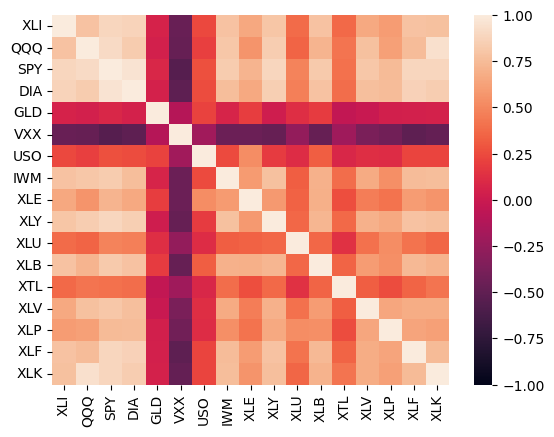

In [5]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1)

## Scatterplots

In [6]:
telecom = sp500_px.loc[sp500_px.index > "2012-07-01", sp500_sym[sp500_sym["sector"] == "telecommunications_services"]["symbol"]]
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


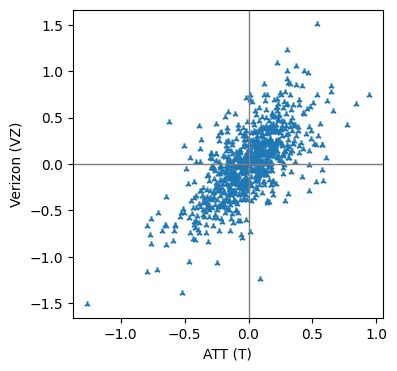

In [7]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker="2")
ax.set_xlabel("ATT (T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)